In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
image_directory = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/'
dataset = []  
label = []
SIZE=64
os.listdir('/kaggle/input/cell-images-for-detecting-malaria/cell_images/')
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):   
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


In [3]:
len(dataset)/2

13779.0

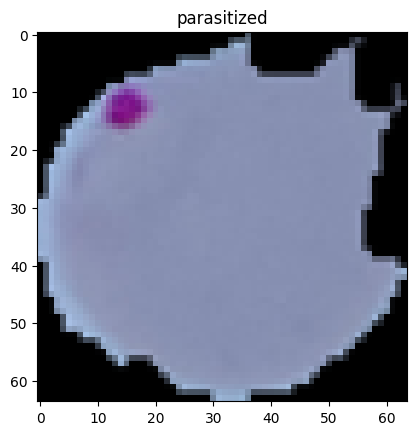

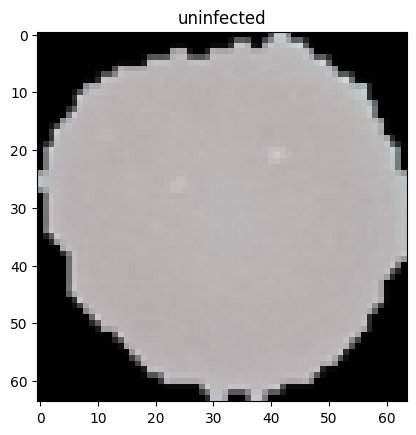

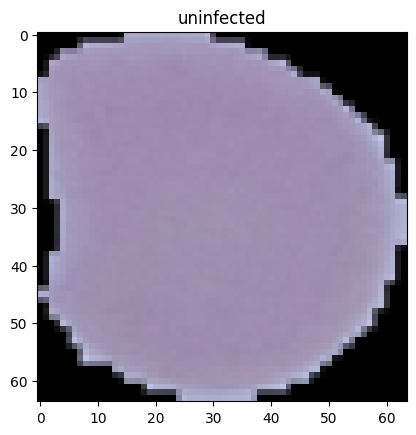

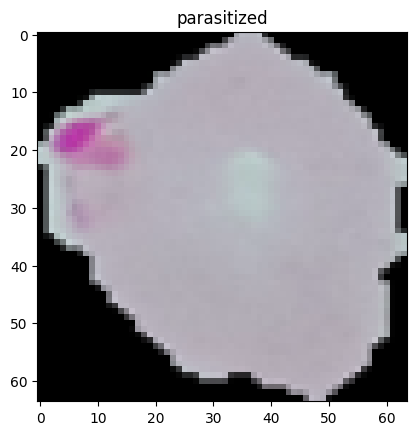

In [4]:
%matplotlib inline 
from matplotlib import pyplot as plt
import random
classes=["parasitized","uninfected"]
l=random.sample(range(0, 27558), 4)
for i in l:
    plt.title(f"{classes[label[i]]}")
    plt.imshow(dataset[i])
    plt.show()

In [5]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [7]:
np.array(X_train[0])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [8]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 50,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False)

Epoch 1/50


2023-09-04 18:00:53.571411: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


311/311 [==============================] - 14s 11ms/step - loss: 0.4606 - accuracy: 0.8008 - val_loss: 0.4882 - val_accuracy: 0.8603
Epoch 2/50
311/311 [==============================] - 3s 9ms/step - loss: 0.2278 - accuracy: 0.9145 - val_loss: 0.7596 - val_accuracy: 0.8630
Epoch 3/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1942 - accuracy: 0.9303 - val_loss: 0.4616 - val_accuracy: 0.8975
Epoch 4/50
311/311 [==============================] - 3s 10ms/step - loss: 0.1846 - accuracy: 0.9322 - val_loss: 0.1923 - val_accuracy: 0.9388
Epoch 5/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1635 - accuracy: 0.9407 - val_loss: 0.2092 - val_accuracy: 0.9388
Epoch 6/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1505 - accuracy: 0.9473 - val_loss: 0.2962 - val_accuracy: 0.9043
Epoch 7/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1356 - accuracy: 0.9505 - val_loss: 0.2498 - val_accuracy: 0.9166
Epoch 8/50
311

In [9]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 1s 3ms/step - loss: 0.8132 - accuracy: 0.9329
Test_Accuracy: 93.29%


In [10]:
len(X_test)

5512

173/173 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual class: uninfected\nPredicted class: uninfected')

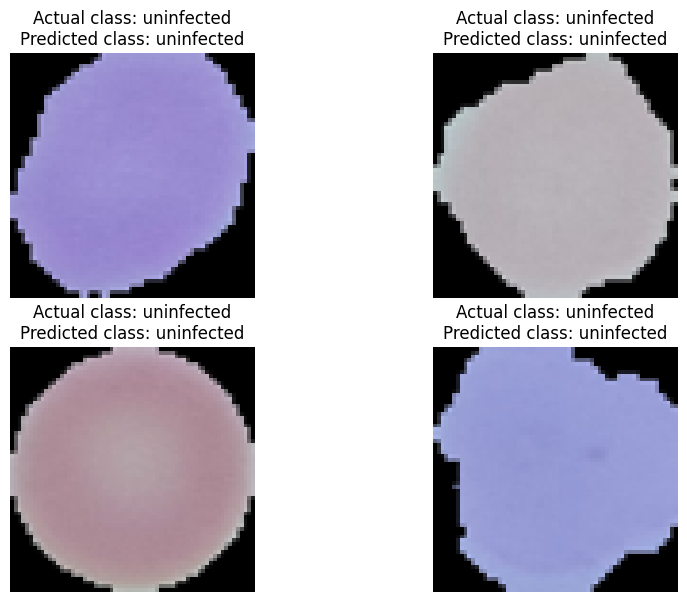

In [11]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns= 2
a,b,c,d=random.sample(range(0, 5512), 4)

fig.add_subplot(rows, columns, 1)
plt.imshow(X_test[a])
plt.axis('off')
plt.title(f"Actual class: {classes[np.argmax(y_test[a])]}\nPredicted class: {classes[np.argmax(model.predict(np.array(X_test))[a])]}")

fig.add_subplot(rows, columns, 2)


plt.imshow(X_test[b])
plt.axis('off')
plt.title(f"Actual class: {classes[np.argmax(y_test[b])]}\nPredicted class: {classes[np.argmax(model.predict(np.array(X_test))[b])]}")


fig.add_subplot(rows, columns, 3)
plt.imshow(X_test[c])
plt.axis('off')
plt.title(f"Actual class: {classes[np.argmax(y_test[c])]}\nPredicted class: {classes[np.argmax(model.predict(np.array(X_test))[c])]}")

fig.add_subplot(rows, columns, 4)
plt.imshow(X_test[d])
plt.axis('off')
plt.title(f"Actual class: {classes[np.argmax(y_test[d])]}\nPredicted class: {classes[np.argmax(model.predict(np.array(X_test))[d])]}")


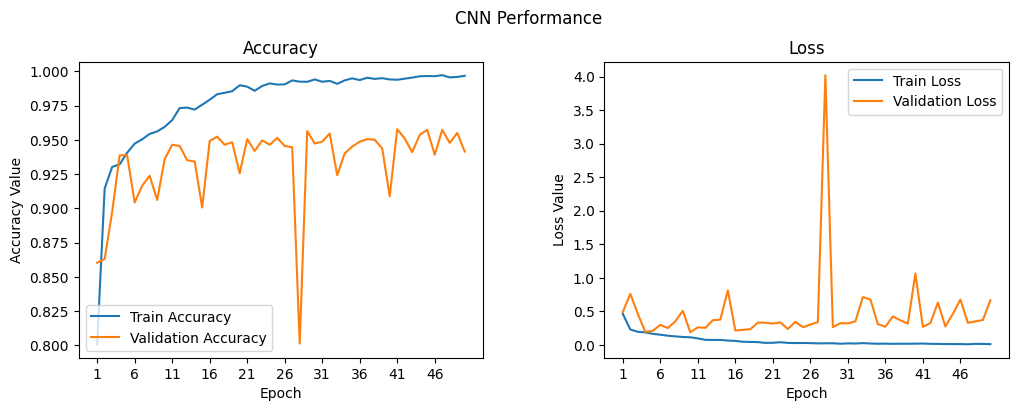

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [13]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 31, 31, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0

In [14]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 50,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False)

Epoch 1/50


2023-09-04 18:04:25.820924: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


311/311 [==============================] - 6s 9ms/step - loss: 0.4434 - accuracy: 0.8181 - val_loss: 5.4700 - val_accuracy: 0.5868
Epoch 2/50
311/311 [==============================] - 3s 9ms/step - loss: 0.2440 - accuracy: 0.9087 - val_loss: 0.4638 - val_accuracy: 0.8794
Epoch 3/50
311/311 [==============================] - 3s 9ms/step - loss: 0.2100 - accuracy: 0.9216 - val_loss: 0.2530 - val_accuracy: 0.9197
Epoch 4/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1976 - accuracy: 0.9285 - val_loss: 0.5356 - val_accuracy: 0.8617
Epoch 5/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1780 - accuracy: 0.9356 - val_loss: 0.2616 - val_accuracy: 0.9007
Epoch 6/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1735 - accuracy: 0.9377 - val_loss: 0.2710 - val_accuracy: 0.9188
Epoch 7/50
311/311 [==============================] - 3s 9ms/step - loss: 0.1563 - accuracy: 0.9436 - val_loss: 0.8698 - val_accuracy: 0.8313
Epoch 8/50
311/31

In [15]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 1s 4ms/step - loss: 0.4698 - accuracy: 0.9434
Test_Accuracy: 94.34%
